# shear2D verification case

A circle of radius $R=0.15$ is placed in a unit-square domain at $C=(0.75, 0.5)$ and advected with the velocity 

$$
        \mathbf{v} = \cos \left(\frac{\pi t}{T}\right) \left[ \begin{matrix} 
            \sin(2\pi y)\sin^2(\pi x) \\ 
            -\sin(2\pi x)\sin^2(\pi y) \\ 
            0
        \end{matrix}\right]
$$

that reverses the flow after $t=0.5T$. Rate of convergence is reported for the absolute error $|\phi_c^{T} - \phi_c^{0}|$ in the $L_\infty$ norm
$$
             e_\phi^\infty = \max_{c \in C} |\phi^{t_e}_c - \phi^0_c|,
$$
with $t_e = T$ and $C$ being the index-set of all mesh cells. The rate of convergence is computed with respect to the discretization length $h$
$$
                h := \max_{f \in F} \| \mathbf{d}_f \|, 
$$
where $F$ is the index-set of all mesh faces.

In [50]:
import pandas as pd
from matplotlib import pyplot as plt
import os

# Find all "leiaLevelSetFoam.csv" files in parameter study folders
csv_filename = "leiaLevelSetFoam.csv"
shear_2D_files = [os.path.join(folder, csv_filename) 
                  for folder in os.listdir(os.curdir) 
                  if os.path.isfile(os.path.join(folder, csv_filename))]
shear_2D_files.sort()

# Read all "leiaLevelSetFoam.csv" files as pandas.DataFrame
cols = ["H", "E_PHI_INF"]
shear_2D_dframe = pd.DataFrame(columns=cols)
for shear_2D_file in shear_2D_files:
    shear_2D_data = pd.read_csv(shear_2D_file, header=None, names=cols)
    shear_2D_dframe = pd.concat([shear_2D_dframe, shear_2D_data])

print(shear_2D_dframe)

          H  E_PHI_INF
0  0.050000   0.003656
0  0.025000   0.005016
0  0.012500   0.005614
0  0.006250   0.005778
0  0.003125   0.005817


[]

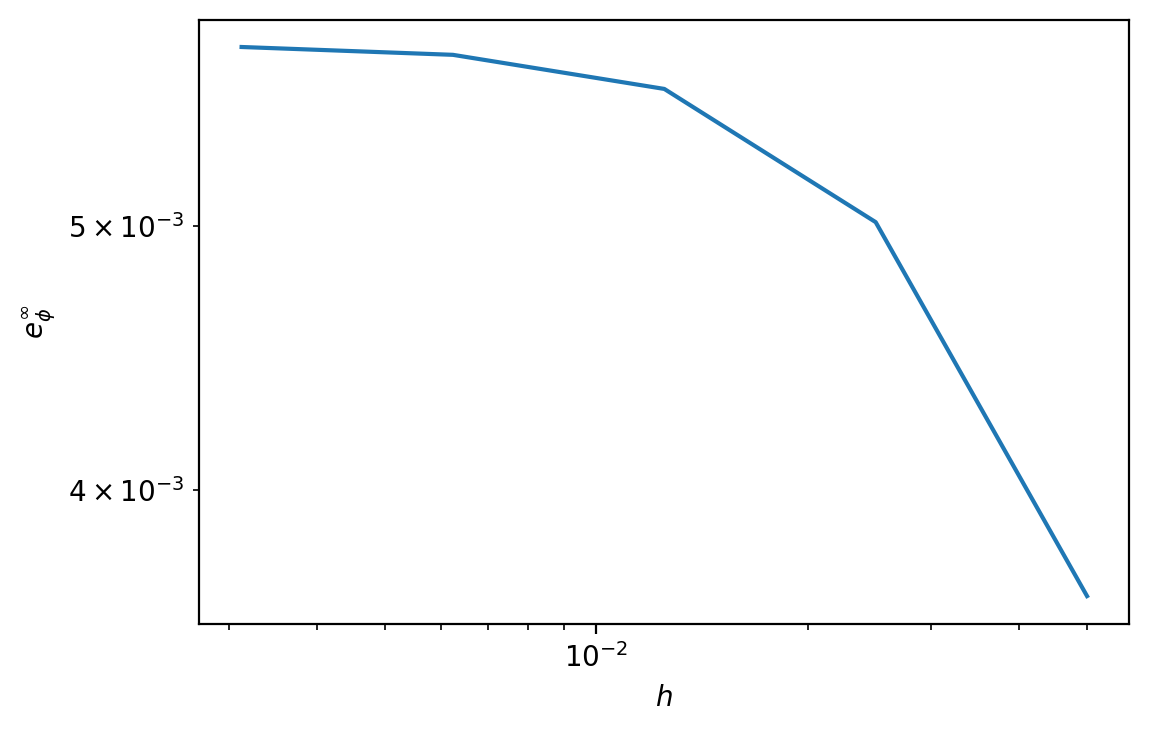

In [52]:
from matplotlib import rcParams
rcParams["figure.dpi"] = 200
plt.plot(shear_2D_dframe["H"], shear_2D_dframe["E_PHI_INF"])
plt.xlabel("$h$")
plt.ylabel("$e_\phi^\infty$")
plt.loglog()